In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
while(1):
    _, frame = cap.read()
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red = np.array([30,150,50])
    upper_red = np.array([255,255,180])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    res = cv2.bitwise_and(frame, frame, mask= mask)
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(mask, kernel, iterations = 1)
    dilation = cv2.dilate(mask, kernel, iterations = 1)
    cv2.imshow('Original',frame)
    cv2.imshow('Mask',mask)
    cv2.imshow('Erosion',erosion)
    cv2.imshow('Dilation',dilation)
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()
cap.release()

KeyboardInterrupt: 

In [3]:
def detectSkLn(rgbImage): 
    r, g, b = cv2.split(rgbImage) 
    mask1 = ((r > 95) & (g > 40) & (b > 20) & ((np.maximum(r, np.maximum(g, b)) - np.minimum(r, np.minimum(g, b))) > 5) & ((np.abs(r-g))>2.5) & (r>g) & (r>b)) 
    mask2 = ((r > 220) & (g > 210) & (b > 170) & (abs(r-g)<=15) & (r > b) & (g > b)) 
    # mask = np.array(mask1, mask2, dtype=np.uint8) 
    mask = mask1 | mask2
    return mask.astype(np.uint8) * 255

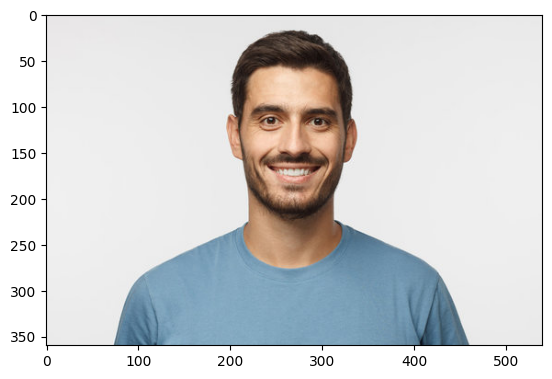

255


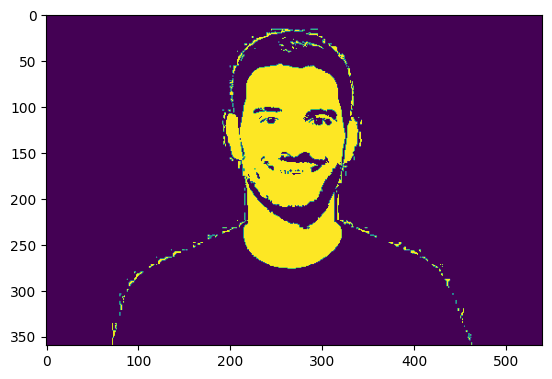

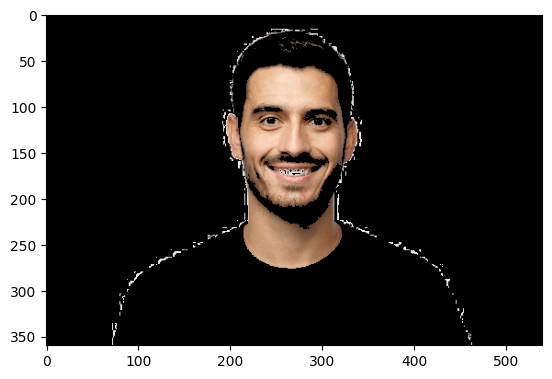

In [79]:
import cv2

img = cv2.imread('newface.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
skinMask = detectSkLn(img)
skin = cv2.bitwise_and(img, img, mask = skinMask)
plt.imshow(img)
plt.show()
plt.imshow(skinMask)
print(skinMask.max())
plt.show()
plt.imshow(skin)
plt.show()

In [64]:
def gaussProbabilityMy(facePixels):
    d1, d2, d3 = facePixels.shape 
    x = np.zeros([d1, d2 * d3]) 
    for i in range(len(facePixels)): 
        x[i] = facePixels[i].flatten() 
        
    x -= np.mean(x, axis = 0) 
    covariance = np.cov(x) 
    mean = x.mean(axis=1) 
    # print (mean, covariance) 
    return mean, covariance

In [80]:
mu, sigma = gaussProbabilityMy(skin)

In [81]:
print(mu.shape)
print(sigma.shape)

(360,)
(360, 360)


In [48]:
def gaussProbability(facePixels):
    mean_vector = np.mean(facePixels, axis=0) #mu

    # Calculate the covariance matrix
    covariance_matrix = np.cov(facePixels, rowvar=False) # Sigma

    return mean_vector, covariance_matrix

In [49]:
skin.shape[0]

372

In [50]:
from numpy import *
import math

def computeGauss(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = linalg.det(sigma)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")
        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = matrix(x - mu)
        inv = sigma.I
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")
        

In [51]:
skinMask.shape

(372, 292)

In [52]:
skinMask.shape

(372, 292)

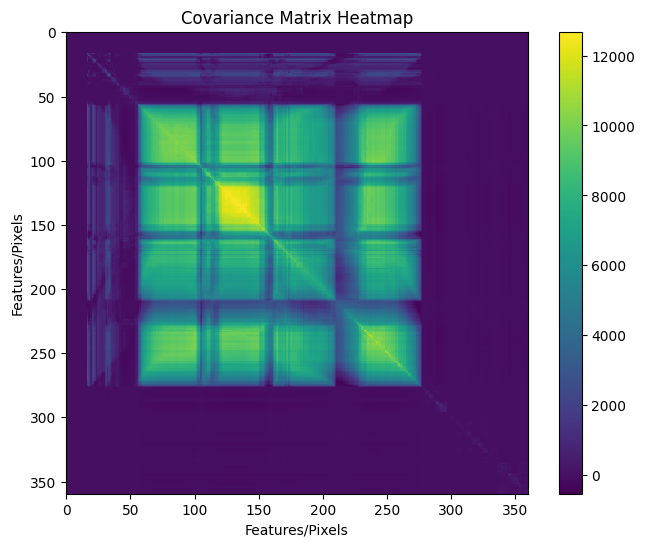

0.0


In [87]:
# mu, sigma = gaussProbability(skinMask)
# print(mu.shape, sigma.shape, len(skinMask))

mean, covariance = gaussProbability(skinMask)

# Visualize the covariance matrix as a heatmap
plt.figure(figsize=(8, 6))
plt.title('Covariance Matrix Heatmap')
plt.imshow(covariance, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.xlabel('Features/Pixels')
plt.ylabel('Features/Pixels')
plt.show()
print(linalg.det(covariance))


In [83]:
print(len(mu), sigma.shape, len(skinMask))

360 (360, 360) 360


In [88]:
# something = computeGauss(skinMask, mean, conv)
result = []
# for i in range(skin.shape[0]):
result = computeGauss(skin, mu, sigma)
# plt.imshow(skin)
# plt.show()

NameError: The covariance matrix can't be singular

In [92]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 796.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
    --------------------------------------- 0.1/9.1 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.4/9.1 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.6/9.1 MB 4.8 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/9.1 MB 4.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.1 MB 5.2 MB/s eta 0:00:02
   ----- ---------------------------------- 1.2/9.1 MB 5.1 MB/s eta 0:00:02
   ------- -------------------------------- 1.7/9.1 MB 5.1 MB/s eta 0:00:02
   -------- ------------------------------- 1.9/9.1 MB 5.3 MB/s eta 0:00:02
   --------- -----

In [93]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler  # Scaling the data might be beneficial

In [94]:
directory = 'faces/69000/'
image_array = []
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        # Read the image using OpenCV
        img = cv2.imread(os.path.join(directory, filename))
        # Check if the image was read successfully
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            image_array.append(img)
        else:
            print(f"Could not read {filename}")

# Display the total number of images read
print(f"Total images read: {len(image_array)}")


Total images read: 1000


In [ ]:
def detectSkLn(rgbImage): 
    r, g, b = cv2.split(rgbImage) 
    mask1 = ((r > 95) & (g > 40) & (b > 20) & ((np.maximum(r, np.maximum(g, b)) - np.minimum(r, np.minimum(g, b))) > 5) & ((np.abs(r-g))>2.5) & (r>g) & (r>b)) 
    mask2 = ((r > 220) & (g > 210) & (b > 170) & (abs(r-g)<=15) & (r > b) & (g > b)) 
    # mask = np.array(mask1, mask2, dtype=np.uint8) 
    mask = mask1 | mask2
    return mask.astype(np.uint8) * 255

In [96]:
skinMasks = [] 
for image in image_array:
    skinMasks.append(detectSkLn(image))
print(f"Total skin masks created: {len(skinMasks)}")

Total skin masks created: 1000


In [98]:
split_index = int(0.75 * len(skinMasks))

# Split the array into two parts
x_train = image_array[:split_index]  # Contains 75% of the elements
x_test = image_array[split_index:]  # Contains the remaining elements

In [99]:
split_index = int(0.75 * len(image_array))

# Split the array into two parts
y_train = skinMasks[:split_index]  # Contains 75% of the elements
y_test = skinMasks[split_index:]  # Contains the remaining elements

In [104]:
image_array[0].shape

(128, 128, 3)

In [105]:
skinMasks[0].shape

(128, 128)

In [100]:
logisticRegr = LogisticRegression()

In [107]:
logisticRegr.fit(x_train, y_train)

ValueError: Found array with dim 3. LogisticRegression expected <= 2.